IMPORTING AND VISUALIZING DATA

In [67]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt            #Visualization
import seaborn as sns    #Visualization
import os
from scipy import stats
from sklearn.cluster import KMeans
%matplotlib inline

In [68]:
data = pd.read_csv("/Users/sys1/Documents/ISH/internships/Inspire'23/DATA/Cleaned_dataset_TI_3M.csv", index_col = 0)
data

,tlc_no,tlc_start_date,life_on_the_day_of_report,maturity_percent,last_scan_date,result,trips_on_prev_day_of_report_date,hm_throughput_kt,fill_qnty_per_trip,fce_circuit,...,seq_no,thermal_imaging_a,thermal_imaging_b,thermal_imaging_c,thermal_imaging_d,thermal_imaging_f,thermal_imaging_g,thermal_imaging_h,thermal_imaging_i,thermal_imaging_condition
0,1.0,2022-05-13,746,43.9,2023-03-01,NORM,4.0,138.7,185.9,I,...,39144.0,187.0,154.0,172.0,171.0,194.0,157.0,174.0,169.0,NORMAL
1,2.0,2023-01-25,19,1.1,2023-03-01,NORM,3.0,3.2,169.3,H,...,39084.0,228.0,190.0,226.0,225.0,230.0,191.0,224.0,220.0,NORMAL
2,4.0,2022-10-26,366,21.5,2023-03-01,NORM,3.0,66.7,182.4,F,...,39148.0,191.0,161.0,170.0,171.0,198.0,171.0,185.0,185.0,NORMAL
3,5.0,2023-01-22,112,6.6,2023-03-01,NORM,4.0,16.1,143.5,F,...,39154.0,196.0,158.0,178.0,176.0,208.0,172.0,188.0,188.0,NORMAL
4,6.0,2022-04-09,926,54.5,2023-03-01,NORM,2.0,120.7,130.3,G,...,39123.0,184.0,138.0,161.0,160.0,179.0,143.0,165.0,163.0,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3434,32.0,2022-01-26,1422,74.8,2023-06-06,NORM,3.0,389.4,273.8,H,...,46261.0,230.0,215.0,253.0,253.0,223.0,199.0,224.0,222.0,Normal
3435,37.0,2023-01-22,404,21.3,2023-06-06,NORM,3.0,102.6,253.9,G,...,46251.0,188.0,198.0,202.0,198.0,208.0,182.0,203.0,203.0,NORMAL
3436,41.0,2022-05-20,1114,58.6,2023-06-06,Norm,3.0,299.8,269.1,I,...,46267.0,240.0,185.0,217.0,219.0,244.0,204.0,227.0,222.0,NORMAL
3437,43.0,2022-09-28,659,34.7,2023-06-06,NORM,3.0,171.2,259.7,H,...,46253.0,210.0,179.0,218.0,218.0,227.0,178.0,213.0,211.0,NORMAL


In [69]:
data.isnull().sum()

tlc_no                              0
tlc_start_date                      0
life_on_the_day_of_report           0
maturity_percent                    0
last_scan_date                      0
result                              0
trips_on_prev_day_of_report_date    0
hm_throughput_kt                    0
fill_qnty_per_trip                  0
fce_circuit                         0
last_tare_wt                        0
last_repair_date                    0
plan_repair_freq_days               0
compliance_percent_repair           0
report_date                         0
average_temp                        0
timestamp                           0
seq_no                              0
thermal_imaging_a                   0
thermal_imaging_b                   0
thermal_imaging_c                   0
thermal_imaging_d                   0
thermal_imaging_f                   0
thermal_imaging_g                   0
thermal_imaging_h                   0
thermal_imaging_i                   0
thermal_imag

DATA TYPES HANDLING (object/category to datetime format)

In [70]:
data.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

In [71]:
data.dtypes

tlc_no                              float64
tlc_start_date                       object
life_on_the_day_of_report             int64
maturity_percent                    float64
last_scan_date                       object
result                               object
trips_on_prev_day_of_report_date    float64
hm_throughput_kt                    float64
fill_qnty_per_trip                  float64
fce_circuit                          object
last_tare_wt                        float64
last_repair_date                     object
plan_repair_freq_days               float64
compliance_percent_repair           float64
report_date                          object
average_temp                        float64
timestamp                            object
seq_no                              float64
thermal_imaging_a                   float64
thermal_imaging_b                   float64
thermal_imaging_c                   float64
thermal_imaging_d                   float64
thermal_imaging_f               

In [72]:
# List of object columns to convert
object_columns = ['tlc_start_date', 'last_scan_date', 'report_date']

# Convert object columns to datetime
for column in object_columns:
    data[column] = pd.to_datetime(data[column], dayfirst=True, errors='coerce')

In [73]:
data.isnull().sum()

tlc_no                              0
tlc_start_date                      0
life_on_the_day_of_report           0
maturity_percent                    0
last_scan_date                      0
result                              0
trips_on_prev_day_of_report_date    0
hm_throughput_kt                    0
fill_qnty_per_trip                  0
fce_circuit                         0
last_tare_wt                        0
last_repair_date                    0
plan_repair_freq_days               0
compliance_percent_repair           0
report_date                         0
average_temp                        0
timestamp                           0
seq_no                              0
thermal_imaging_a                   0
thermal_imaging_b                   0
thermal_imaging_c                   0
thermal_imaging_d                   0
thermal_imaging_f                   0
thermal_imaging_g                   0
thermal_imaging_h                   0
thermal_imaging_i                   0
thermal_imag

In [74]:
data.dtypes

tlc_no                                     float64
tlc_start_date                      datetime64[ns]
life_on_the_day_of_report                    int64
maturity_percent                           float64
last_scan_date                      datetime64[ns]
result                                      object
trips_on_prev_day_of_report_date           float64
hm_throughput_kt                           float64
fill_qnty_per_trip                         float64
fce_circuit                                 object
last_tare_wt                               float64
last_repair_date                            object
plan_repair_freq_days                      float64
compliance_percent_repair                  float64
report_date                         datetime64[ns]
average_temp                               float64
timestamp                                   object
seq_no                                     float64
thermal_imaging_a                          float64
thermal_imaging_b              

In [75]:
# Convert the object column to datetime
data['last_repair_date'] = pd.to_datetime(data['last_repair_date'], format='%d-%b', errors='coerce') + pd.offsets.DateOffset(years=2023-1900)


# Identify the remaining non-null values after the first conversion
remaining_values = data['last_repair_date'].isna()

# Convert the remaining non-null values with a different format
data.loc[remaining_values, 'last_repair_date'] = pd.to_datetime(data.loc[remaining_values, 'last_repair_date'], format='%d/%b', errors='coerce') + pd.offsets.DateOffset(years=2023-1900)


In [76]:
data['last_repair_date'].isnull().sum()

408

In [77]:
data = data.dropna(subset=['last_repair_date'])

In [78]:
data.isnull().sum()

tlc_no                              0
tlc_start_date                      0
life_on_the_day_of_report           0
maturity_percent                    0
last_scan_date                      0
result                              0
trips_on_prev_day_of_report_date    0
hm_throughput_kt                    0
fill_qnty_per_trip                  0
fce_circuit                         0
last_tare_wt                        0
last_repair_date                    0
plan_repair_freq_days               0
compliance_percent_repair           0
report_date                         0
average_temp                        0
timestamp                           0
seq_no                              0
thermal_imaging_a                   0
thermal_imaging_b                   0
thermal_imaging_c                   0
thermal_imaging_d                   0
thermal_imaging_f                   0
thermal_imaging_g                   0
thermal_imaging_h                   0
thermal_imaging_i                   0
thermal_imag

In [79]:
# Create a new column for the time difference
data['days_after_gunning'] = data['last_scan_date'] - data['last_repair_date']
data

/var/folders/r1/wtdlx40s1dbflxt51nxdl3zr0000gn/T/ipykernel_25840/975738676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['days_after_gunning'] = data['last_scan_date'] - data['last_repair_date']


,tlc_no,tlc_start_date,life_on_the_day_of_report,maturity_percent,last_scan_date,result,trips_on_prev_day_of_report_date,hm_throughput_kt,fill_qnty_per_trip,fce_circuit,...,thermal_imaging_a,thermal_imaging_b,thermal_imaging_c,thermal_imaging_d,thermal_imaging_f,thermal_imaging_g,thermal_imaging_h,thermal_imaging_i,thermal_imaging_condition,days_after_gunning
0,1.0,2022-05-13,746,43.9,2023-03-01,NORM,4.0,138.7,185.9,I,...,187.0,154.0,172.0,171.0,194.0,157.0,174.0,169.0,NORMAL,2 days
1,2.0,2023-01-25,19,1.1,2023-03-01,NORM,3.0,3.2,169.3,H,...,228.0,190.0,226.0,225.0,230.0,191.0,224.0,220.0,NORMAL,4 days
2,4.0,2022-10-26,366,21.5,2023-03-01,NORM,3.0,66.7,182.4,F,...,191.0,161.0,170.0,171.0,198.0,171.0,185.0,185.0,NORMAL,8 days
3,5.0,2023-01-22,112,6.6,2023-03-01,NORM,4.0,16.1,143.5,F,...,196.0,158.0,178.0,176.0,208.0,172.0,188.0,188.0,NORMAL,2 days
4,6.0,2022-04-09,926,54.5,2023-03-01,NORM,2.0,120.7,130.3,G,...,184.0,138.0,161.0,160.0,179.0,143.0,165.0,163.0,NORMAL,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,35.0,2022-04-10,707,37.2,2023-06-05,NORM,2.0,185.0,261.7,I,...,220.0,197.0,224.0,226.0,231.0,201.0,225.0,221.0,NORMAL,5 days
3417,43.0,2022-09-28,656,34.5,2023-06-05,NORM,4.0,170.3,259.7,I,...,213.0,180.0,210.0,209.0,225.0,177.0,209.0,209.0,NORMAL,7 days
3421,48.0,2022-07-08,829,43.6,2023-06-05,NORM,4.0,216.6,261.3,I,...,214.0,179.0,216.0,218.0,219.0,189.0,213.0,210.0,NORMAL,6 days
3430,17.0,2023-03-03,269,14.2,2023-06-06,Norm,3.0,68.6,255.1,I,...,246.0,202.0,223.0,222.0,251.0,198.0,218.0,216.0,Normal,10 days


In [80]:
data['days_after_gunning']

0       2 days
1       4 days
2       8 days
3       2 days
4       4 days
         ...  
3413    5 days
3417    7 days
3421    6 days
3430   10 days
3435    9 days
Name: days_after_gunning, Length: 3031, dtype: timedelta64[ns]

In [81]:
# Convert the timedelta column to float64
data['days_after_gunning'] = data['days_after_gunning'].dt.days.astype('float64')

/var/folders/r1/wtdlx40s1dbflxt51nxdl3zr0000gn/T/ipykernel_25840/2375015313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['days_after_gunning'] = data['days_after_gunning'].dt.days.astype('float64')


In [82]:
data['days_after_gunning']

0        2.0
1        4.0
2        8.0
3        2.0
4        4.0
        ... 
3413     5.0
3417     7.0
3421     6.0
3430    10.0
3435     9.0
Name: days_after_gunning, Length: 3031, dtype: float64

In [83]:
data['days_after_gunning'].value_counts()

1.0     473
2.0     458
0.0     450
3.0     387
4.0     295
5.0     236
6.0     178
7.0     144
8.0     105
9.0      65
10.0     59
12.0     56
11.0     50
13.0     43
14.0     25
15.0      5
16.0      2
Name: days_after_gunning, dtype: int64

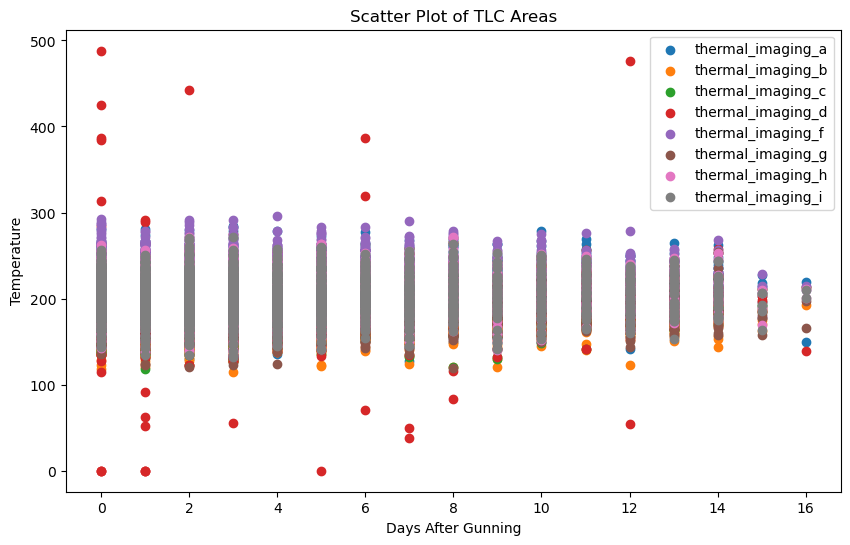

In [84]:
# Define the columns to plot
tlc_areas = ['thermal_imaging_a', 'thermal_imaging_b', 'thermal_imaging_c', 'thermal_imaging_d', 'thermal_imaging_f', 'thermal_imaging_g', 'thermal_imaging_h', 'thermal_imaging_i']

# Set the x-axis values
x = data['days_after_gunning']

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the scatter points for each column after removing outliers
for column in tlc_areas:
    y = data[column]
    
    # Calculate z-scores for each value in the column
    z_scores = np.abs(stats.zscore(y))
    
    # Define a threshold to identify outliers (e.g., z-score > 3)
    threshold = 3
    
    # Filter out the outliers based on the threshold
    x_filtered = x[z_scores <= threshold]
    y_filtered = y[z_scores <= threshold]
    
    # Plot the filtered scatter points
    ax.scatter(x_filtered, y_filtered, label=column)

# Add labels and title
ax.set_xlabel('Days After Gunning')
ax.set_ylabel('Temperature')
ax.set_title('Scatter Plot of TLC Areas')

# Add a legend
ax.legend()

# Display the plot
plt.show()

In [85]:
tlc_areas = ['thermal_imaging_a', 'thermal_imaging_b', 'thermal_imaging_c', 'thermal_imaging_d', 'thermal_imaging_f', 'thermal_imaging_g', 'thermal_imaging_h', 'thermal_imaging_i']
temperature_data = data[tlc_areas + ['days_after_gunning']]

melted_data = temperature_data.melt('days_after_gunning', var_name='Temperature', value_name='Temperature Value')

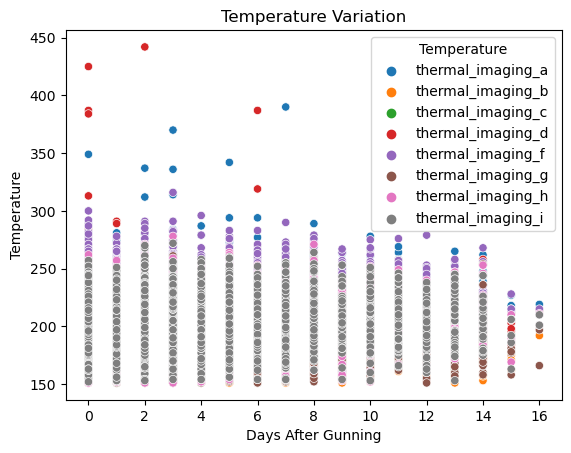

In [86]:
# Filter out outliers from the data
filtered_data = melted_data[(melted_data['Temperature Value'] > 150) & (melted_data['Temperature Value'] < 450)]

# Create the scatter plot with outliers removed
sns.scatterplot(data=filtered_data, x='days_after_gunning', y='Temperature Value', hue='Temperature')
plt.title('Temperature Variation')
plt.xlabel('Days After Gunning')
plt.ylabel('Temperature')
plt.show()

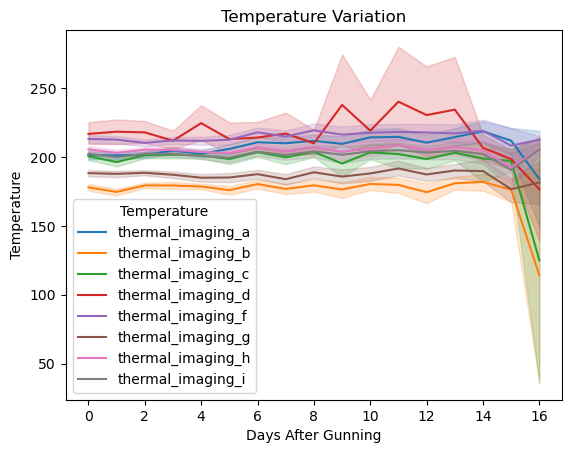

In [87]:
sns.lineplot(data=melted_data, x='days_after_gunning', y='Temperature Value', hue='Temperature')
plt.title('Temperature Variation')
plt.xlabel('Days After Gunning')
plt.ylabel('Temperature')
plt.show()

In [88]:
data.tlc_no.value_counts()

48.0    75
7.0     73
32.0    71
43.0    71
35.0    70
33.0    70
36.0    70
6.0     70
39.0    69
24.0    69
34.0    68
40.0    68
20.0    68
21.0    68
47.0    68
28.0    68
11.0    67
2.0     67
29.0    67
41.0    67
5.0     67
45.0    67
9.0     67
17.0    67
31.0    67
4.0     66
23.0    65
8.0     65
18.0    65
13.0    65
19.0    63
44.0    63
3.0     62
14.0    61
12.0    61
38.0    61
1.0     60
37.0    60
16.0    59
10.0    59
26.0    58
25.0    54
22.0    49
46.0    49
27.0    48
42.0    43
15.0    39
30.0    37
Name: tlc_no, dtype: int64

In [89]:
data.head()

,tlc_no,tlc_start_date,life_on_the_day_of_report,maturity_percent,last_scan_date,result,trips_on_prev_day_of_report_date,hm_throughput_kt,fill_qnty_per_trip,fce_circuit,...,thermal_imaging_a,thermal_imaging_b,thermal_imaging_c,thermal_imaging_d,thermal_imaging_f,thermal_imaging_g,thermal_imaging_h,thermal_imaging_i,thermal_imaging_condition,days_after_gunning
0,1.0,2022-05-13,746,43.9,2023-03-01,NORM,4.0,138.7,185.9,I,...,187.0,154.0,172.0,171.0,194.0,157.0,174.0,169.0,NORMAL,2.0
1,2.0,2023-01-25,19,1.1,2023-03-01,NORM,3.0,3.2,169.3,H,...,228.0,190.0,226.0,225.0,230.0,191.0,224.0,220.0,NORMAL,4.0
2,4.0,2022-10-26,366,21.5,2023-03-01,NORM,3.0,66.7,182.4,F,...,191.0,161.0,170.0,171.0,198.0,171.0,185.0,185.0,NORMAL,8.0
3,5.0,2023-01-22,112,6.6,2023-03-01,NORM,4.0,16.1,143.5,F,...,196.0,158.0,178.0,176.0,208.0,172.0,188.0,188.0,NORMAL,2.0
4,6.0,2022-04-09,926,54.5,2023-03-01,NORM,2.0,120.7,130.3,G,...,184.0,138.0,161.0,160.0,179.0,143.0,165.0,163.0,NORMAL,4.0


In [90]:
data.describe()

,tlc_no,life_on_the_day_of_report,maturity_percent,trips_on_prev_day_of_report_date,hm_throughput_kt,fill_qnty_per_trip,last_tare_wt,plan_repair_freq_days,compliance_percent_repair,average_temp,seq_no,thermal_imaging_a,thermal_imaging_b,thermal_imaging_c,thermal_imaging_d,thermal_imaging_f,thermal_imaging_g,thermal_imaging_h,thermal_imaging_i,days_after_gunning
count,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000
mean,24.509073,831.311118,46.052128,2.863411,189.979017,227.320257,257.904982,7.222369,97.220059,160.752128,42548.383702,204.642692,177.847245,200.178489,217.840647,213.252392,187.257011,204.710986,201.746618,3.708017
std,13.998863,506.800952,28.089436,0.845772,128.897145,45.474535,47.648045,4.039170,11.851922,19.973152,2055.029908,26.766390,23.952912,27.442652,90.190012,27.748778,22.991552,23.757027,23.799572,3.349824
min,1.000000,1.000000,0.100000,1.000000,0.100000,79.300000,113.000000,3.000000,0.000000,0.000000,39084.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,418.500000,23.050000,2.000000,89.450000,184.100000,205.000000,3.000000,100.000000,149.650000,40762.500000,189.000000,167.000000,188.000000,189.000000,196.000000,174.000000,191.000000,188.000000,1.000000
50%,24.000000,815.000000,45.600000,3.000000,168.400000,257.200000,290.000000,6.000000,100.000000,159.500000,42296.000000,205.000000,179.000000,201.000000,203.000000,212.000000,187.000000,205.000000,202.000000,3.000000
75%,37.000000,1233.500000,66.550000,3.000000,275.150000,266.000000,300.000000,13.000000,100.000000,171.500000,44345.000000,220.000000,191.000000,216.000000,219.000000,231.000000,202.000000,220.000000,217.000000,5.000000
max,48.000000,2003.000000,109.600000,6.000000,544.700000,285.700000,319.000000,16.000000,100.000000,275.900000,46258.000000,390.000000,239.000000,270.000000,956.000000,316.000000,261.000000,278.000000,272.000000,16.000000


<Axes: xlabel='trips_on_prev_day_of_report_date', ylabel='Density'>

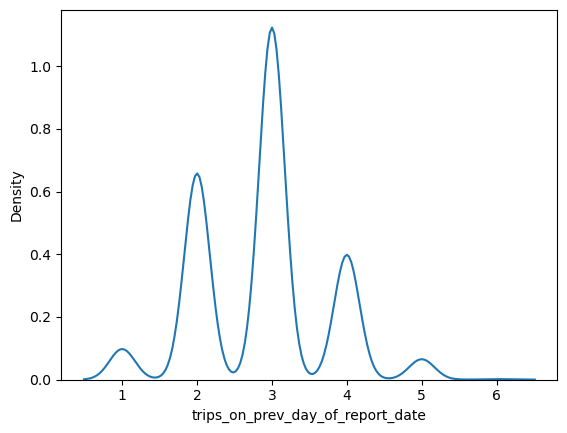

In [91]:
sns.kdeplot(data['trips_on_prev_day_of_report_date'])

<Axes: xlabel='plan_repair_freq_days', ylabel='Density'>

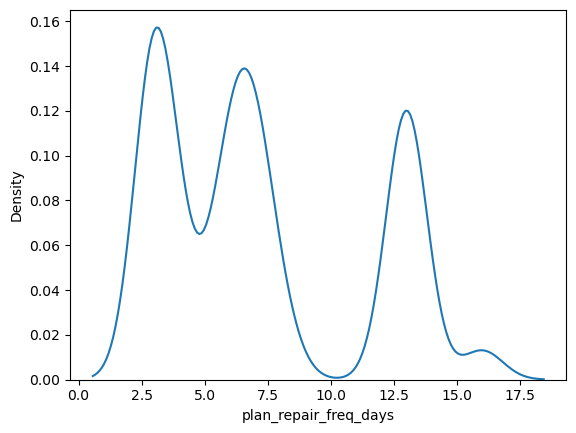

In [92]:
sns.kdeplot(data['plan_repair_freq_days'])

In [93]:
def tlc_no(n, data):
    for tlc in data:
        tlc_n = data.loc[data['tlc_no'] == n]
        return tlc_n

In [94]:
# Perform k-means clustering
k = 6  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(data.iloc[:, 2].values.reshape(-1, 1))

# Access cluster centers and inertia (sum of squared distances to the nearest centroid)
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

# Print cluster labels and corresponding data points
for i in range(k):
    cluster_data = data[cluster_labels == i]
    print(f"Cluster {i+1}:")
    print(cluster_data)
   
# Print cluster centers
print("Cluster Centers:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1} center:", centroid)

# Print inertia
print("Inertia:", inertia)

Cluster 1:
      tlc_no tlc_start_date  life_on_the_day_of_report  maturity_percent  \
9       13.0     2022-08-17                        519              30.5   
12      16.0     2022-07-25                        599              35.2   
26      33.0     2022-08-06                        596              31.4   
28      35.0     2022-10-04                        431              22.7   
29      36.0     2022-07-17                        678              35.7   
...      ...            ...                        ...               ...   
3376    35.0     2022-04-10                        705              37.1   
3382    43.0     2022-09-28                        652              34.3   
3413    35.0     2022-04-10                        707              37.2   
3417    43.0     2022-09-28                        656              34.5   
3435    37.0     2023-01-22                        404              21.3   

     last_scan_date result  trips_on_prev_day_of_report_date  \
9        202

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [95]:
col = list(data.columns.values)
col

['tlc_no',
 'tlc_start_date',
 'life_on_the_day_of_report',
 'maturity_percent',
 'last_scan_date',
 'result',
 'trips_on_prev_day_of_report_date',
 'hm_throughput_kt',
 'fill_qnty_per_trip',
 'fce_circuit',
 'last_tare_wt',
 'last_repair_date',
 'plan_repair_freq_days',
 'compliance_percent_repair',
 'report_date',
 'average_temp',
 'timestamp',
 'seq_no',
 'thermal_imaging_a',
 'thermal_imaging_b',
 'thermal_imaging_c',
 'thermal_imaging_d',
 'thermal_imaging_f',
 'thermal_imaging_g',
 'thermal_imaging_h',
 'thermal_imaging_i',
 'thermal_imaging_condition',
 'days_after_gunning']

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


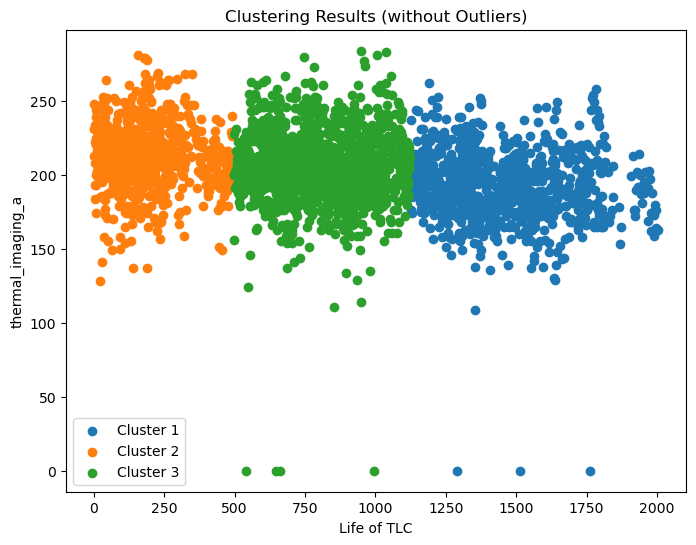

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


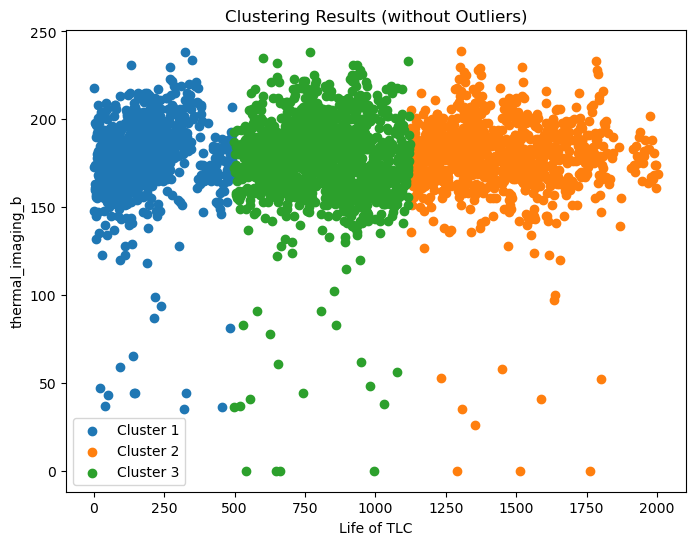

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


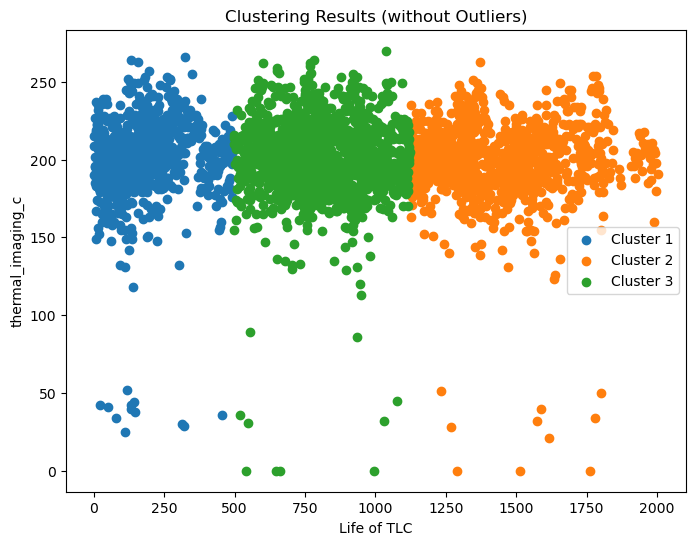

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


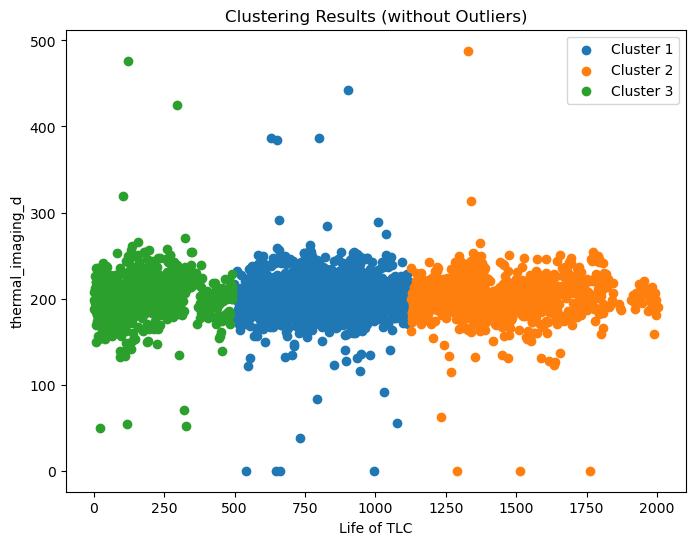

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


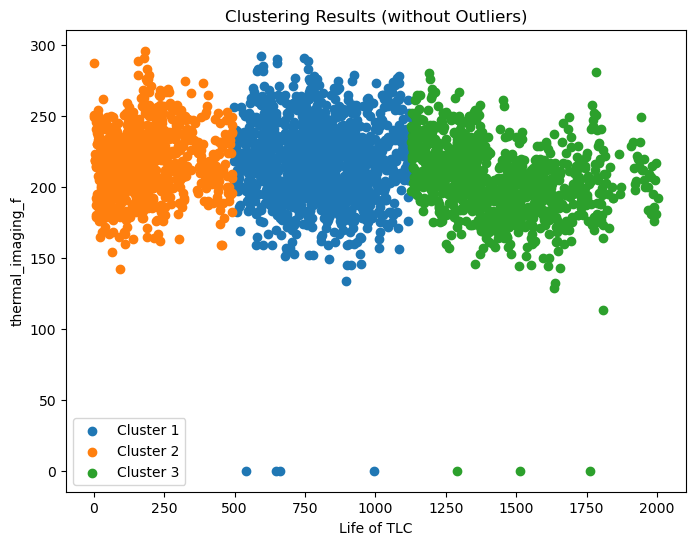

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


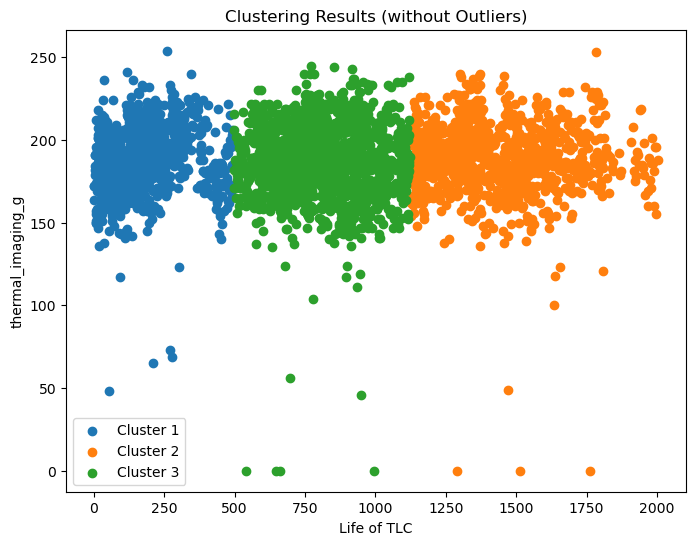

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


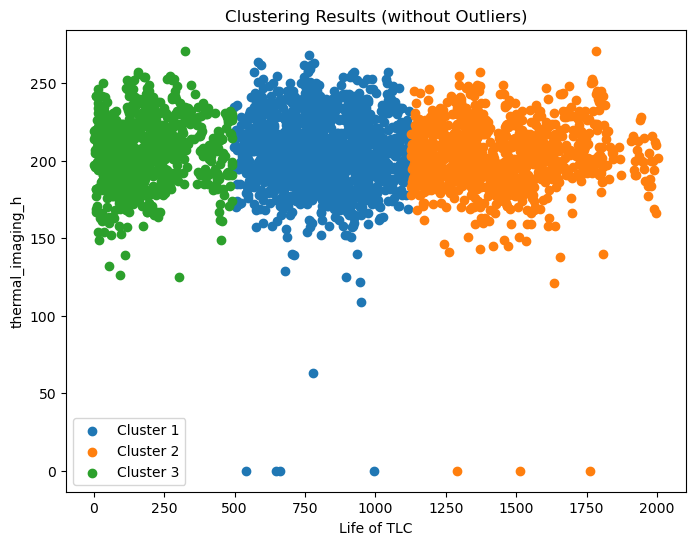

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


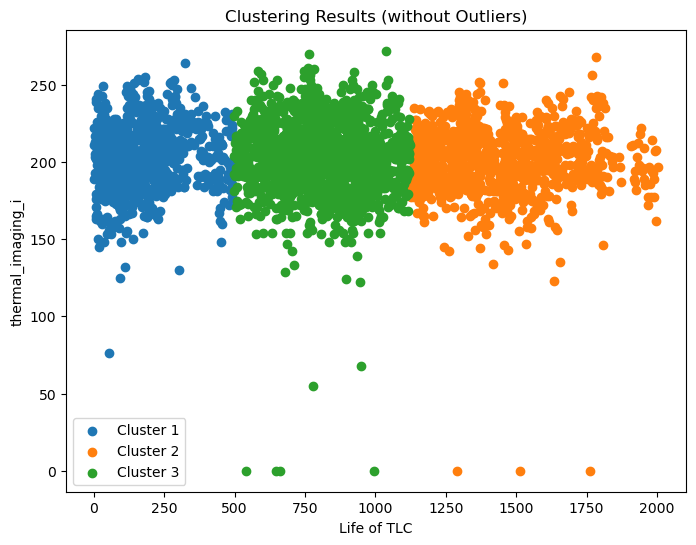

In [96]:
tlc_areas = ['thermal_imaging_a', 'thermal_imaging_b', 'thermal_imaging_c', 'thermal_imaging_d', 'thermal_imaging_f', 'thermal_imaging_g', 'thermal_imaging_h', 'thermal_imaging_i']


for temp_range in tlc_areas:
    
    # Calculate z-scores for the temperature range
    z_scores = stats.zscore(data[temp_range])
    
    # Set a threshold for outlier detection (e.g., z-score > 3)
    threshold = 3
    
    # Filter out the outliers
    filtered_data = data[z_scores <= threshold]
    
    # Perform clustering on the filtered data
    # Replace this with your actual clustering code or function
    # For example, using KMeans from scikit-learn
    from sklearn.cluster import KMeans
    
    X = filtered_data[["life_on_the_day_of_report", temp_range]]
    kmeans = KMeans(n_clusters=3)
    cluster_labels = kmeans.fit_predict(X)
    k = len(np.unique(cluster_labels))
    
    # Visualize the clusters
    plt.figure(figsize=(8, 6))
    for i in range(k):
        cluster_data = filtered_data[cluster_labels == i]
        plt.scatter(cluster_data["life_on_the_day_of_report"], cluster_data[temp_range], label=f'Cluster {i+1}')

    plt.xlabel('Life of TLC')
    plt.ylabel(temp_range)
    plt.title('Clustering Results (without Outliers)')
    plt.legend()
    plt.show()

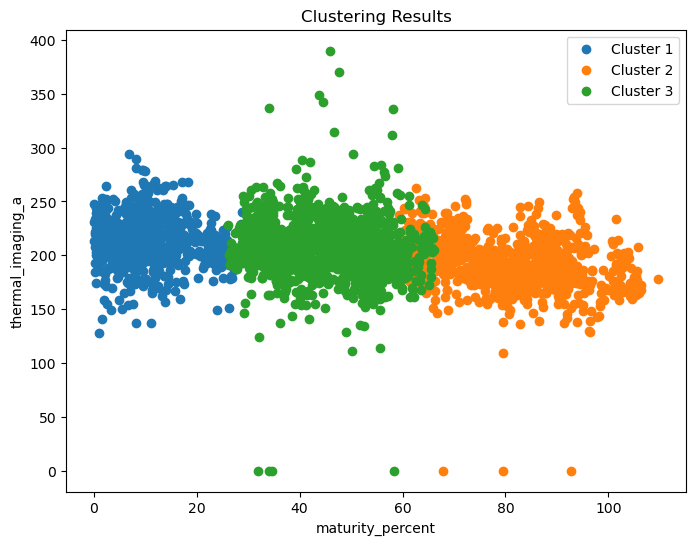

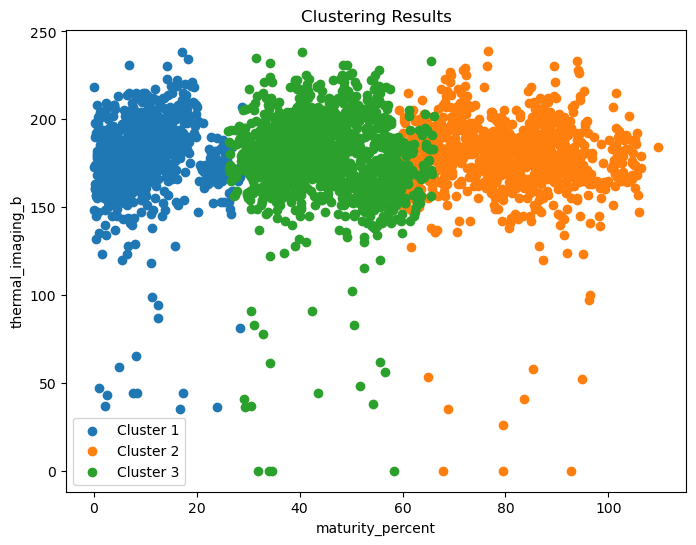

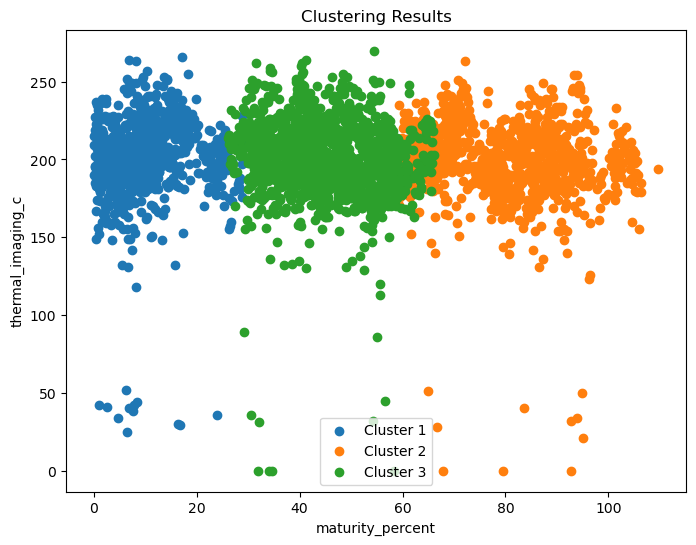

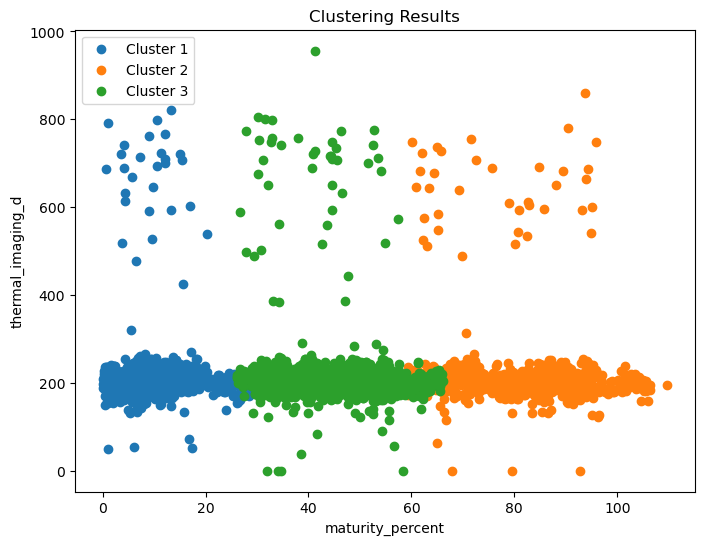

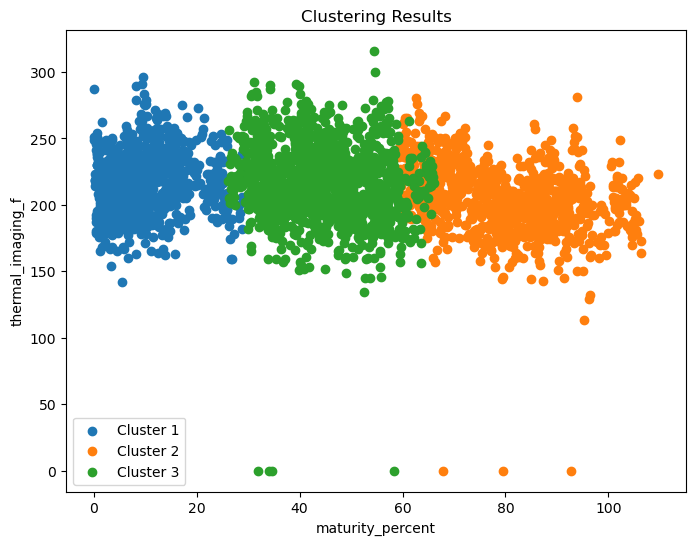

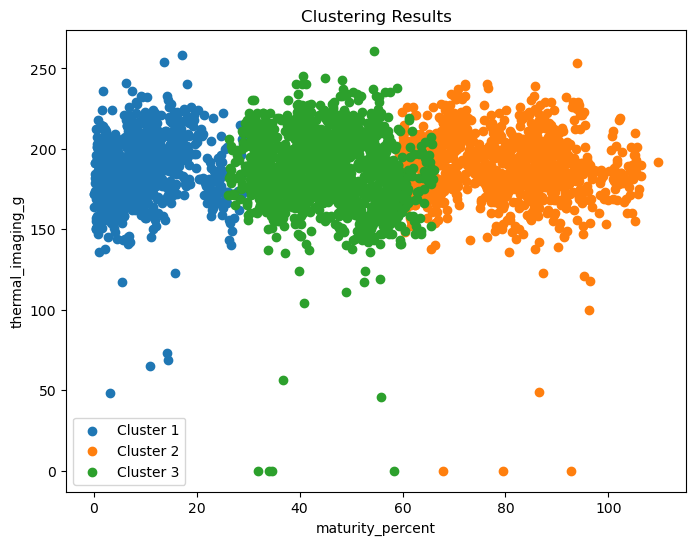

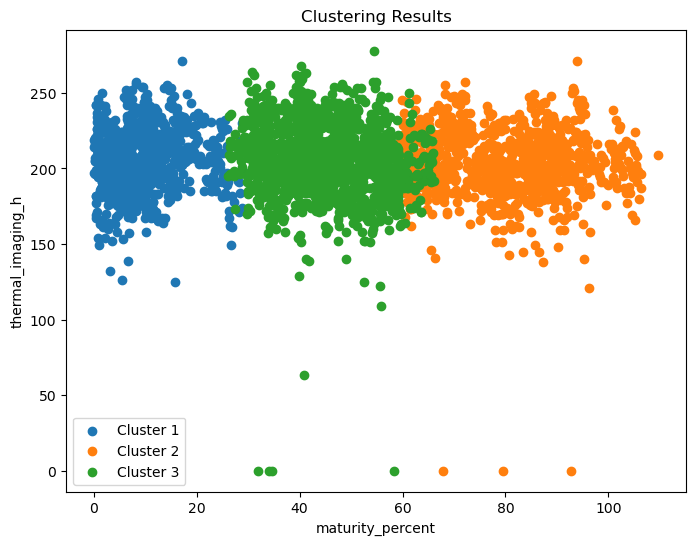

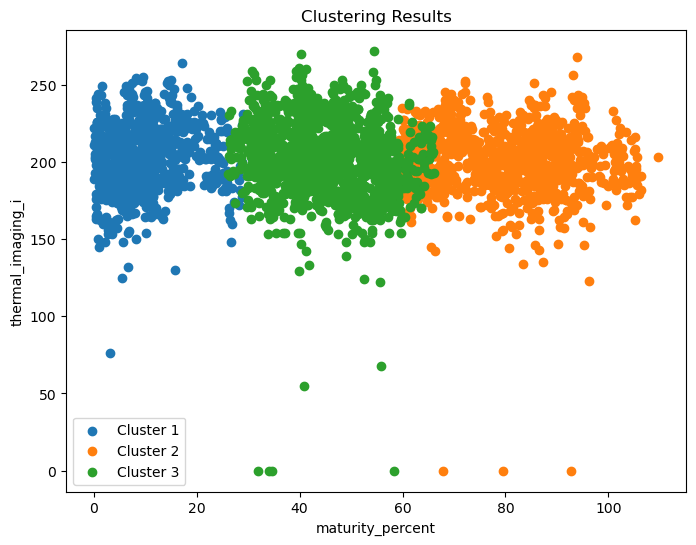

In [97]:
tlc_areas = ['thermal_imaging_a', 'thermal_imaging_b', 'thermal_imaging_c', 'thermal_imaging_d', 'thermal_imaging_f', 'thermal_imaging_g', 'thermal_imaging_h', 'thermal_imaging_i']

for temp_range in tlc_areas:
    
    # Visualize the clusters
    plt.figure(figsize=(8, 6))
    for i in range(k):
        cluster_data = data[cluster_labels == i]
        plt.scatter(cluster_data["maturity_percent"], cluster_data[temp_range], label=f'Cluster {i+1}')

    plt.xlabel('maturity_percent')
    plt.ylabel(temp_range)
    plt.title('Clustering Results')
    plt.legend()
    plt.show()

/var/folders/r1/wtdlx40s1dbflxt51nxdl3zr0000gn/T/ipykernel_25840/3046263784.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cleaned_data['life_on_the_day_of_report'], cleaned_data['thermal_imaging_a'], label='Temperature A', c = colors[1])
/var/folders/r1/wtdlx40s1dbflxt51nxdl3zr0000gn/T/ipykernel_25840/3046263784.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cleaned_data['life_on_the_day_of

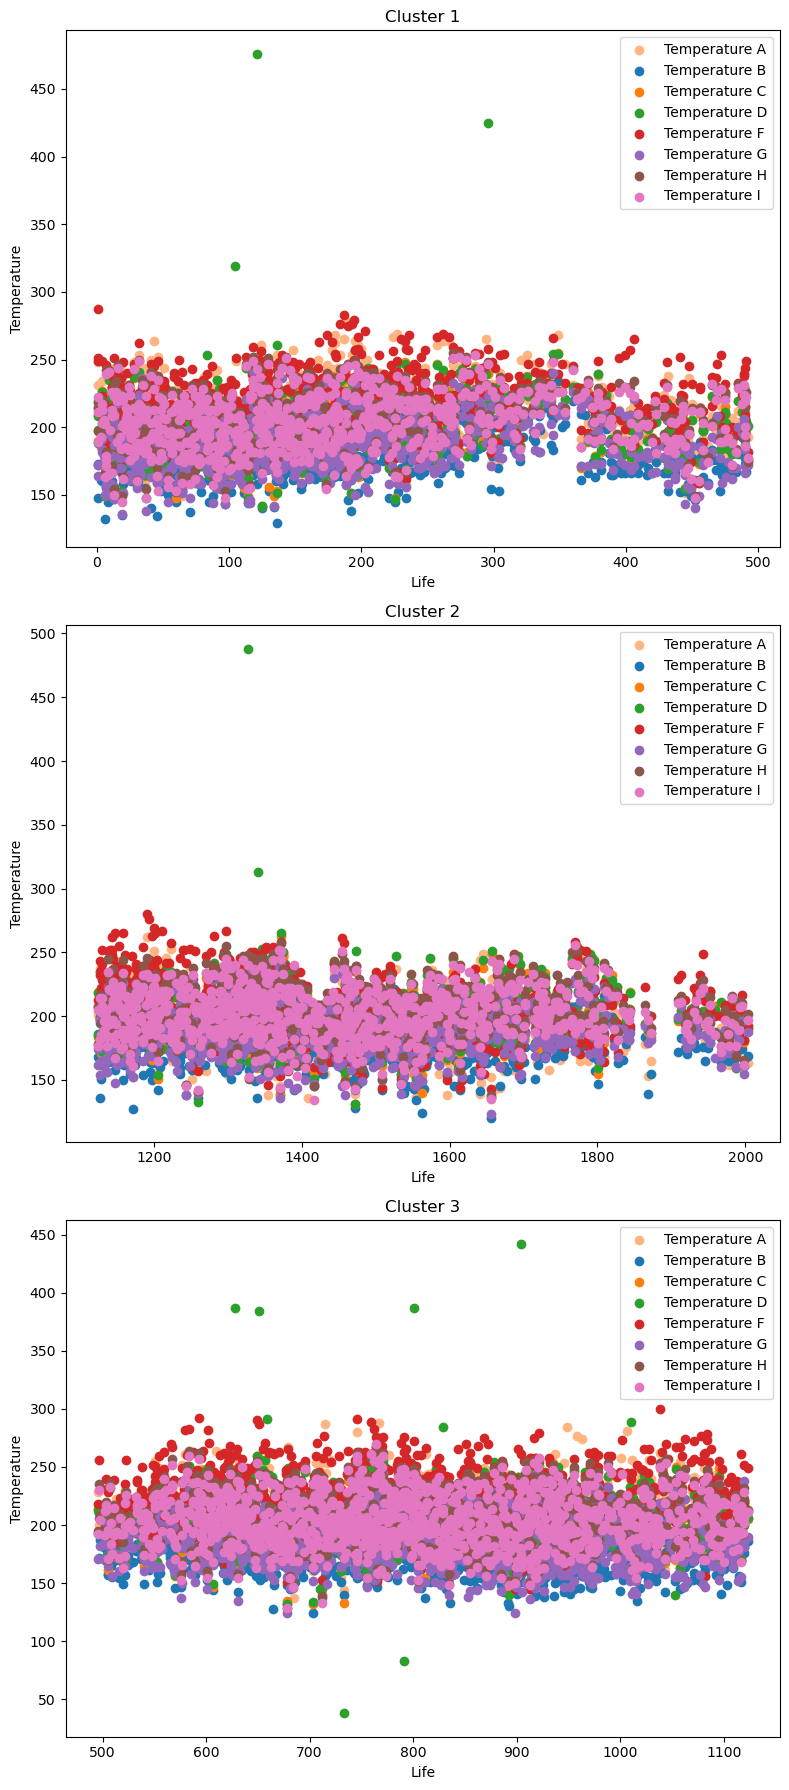

In [98]:
# Set a lighter color palette
colors = sns.color_palette("pastel", k)

# Set up the plot
fig, axs = plt.subplots(k, 1, figsize=(8, 6 * k))

# Iterate over each cluster
for i in range(k):
    # Get the data points for the current cluster
    cluster_data = data[cluster_labels == i]
    
    # Apply outlier removal on temperature columns using z-score method
    z_scores = stats.zscore(cluster_data[['thermal_imaging_a', 'thermal_imaging_b', 'thermal_imaging_c', 'thermal_imaging_d', 'thermal_imaging_f', 'thermal_imaging_g', 'thermal_imaging_h', 'thermal_imaging_i']])
    threshold = 3  # Adjust the threshold based on your data and preferences
    outliers = np.where(np.abs(z_scores) > threshold)[0]
    cleaned_data = cluster_data.drop(cluster_data.index[outliers])
    
    # Create a subplot for the current cluster
    ax = axs[i]
    
    # Plot the temperature columns on the y-axis and the life column on the x-axis
    ax.scatter(cleaned_data['life_on_the_day_of_report'], cleaned_data['thermal_imaging_a'], label='Temperature A', c = colors[1])
    ax.scatter(cleaned_data['life_on_the_day_of_report'], cleaned_data['thermal_imaging_b'], label='Temperature B')
    ax.scatter(cleaned_data['life_on_the_day_of_report'], cleaned_data['thermal_imaging_c'], label='Temperature C')
    ax.scatter(cleaned_data['life_on_the_day_of_report'], cleaned_data['thermal_imaging_d'], label='Temperature D')
    ax.scatter(cleaned_data['life_on_the_day_of_report'], cleaned_data['thermal_imaging_f'], label='Temperature F')
    ax.scatter(cleaned_data['life_on_the_day_of_report'], cleaned_data['thermal_imaging_g'], label='Temperature G')
    ax.scatter(cleaned_data['life_on_the_day_of_report'], cleaned_data['thermal_imaging_h'], label='Temperature H')
    ax.scatter(cleaned_data['life_on_the_day_of_report'], cleaned_data['thermal_imaging_i'], label='Temperature I')
    
    # Set the title and axis labels for the current subplot
    ax.set_title(f"Cluster {i+1}")
    ax.set_xlabel('Life')
    ax.set_ylabel('Temperature')
    
    # Add a legend to the current subplot
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

ADD TRIP FREQUENCY COLUMN

In [99]:
data.dtypes

tlc_no                                     float64
tlc_start_date                      datetime64[ns]
life_on_the_day_of_report                    int64
maturity_percent                           float64
last_scan_date                      datetime64[ns]
result                                      object
trips_on_prev_day_of_report_date           float64
hm_throughput_kt                           float64
fill_qnty_per_trip                         float64
fce_circuit                                 object
last_tare_wt                               float64
last_repair_date                    datetime64[ns]
plan_repair_freq_days                      float64
compliance_percent_repair                  float64
report_date                         datetime64[ns]
average_temp                               float64
timestamp                                   object
seq_no                                     float64
thermal_imaging_a                          float64
thermal_imaging_b              

In [100]:
# Sort the dataframe by tlc_no and last_scan_date
data.sort_values(['tlc_no', 'last_scan_date'], inplace=True)

/var/folders/r1/wtdlx40s1dbflxt51nxdl3zr0000gn/T/ipykernel_25840/1226480640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['tlc_no', 'last_scan_date'], inplace=True)


In [101]:
data.head()

,tlc_no,tlc_start_date,life_on_the_day_of_report,maturity_percent,last_scan_date,result,trips_on_prev_day_of_report_date,hm_throughput_kt,fill_qnty_per_trip,fce_circuit,...,thermal_imaging_a,thermal_imaging_b,thermal_imaging_c,thermal_imaging_d,thermal_imaging_f,thermal_imaging_g,thermal_imaging_h,thermal_imaging_i,thermal_imaging_condition,days_after_gunning
0,1.0,2022-05-13,746,43.9,2023-03-01,NORM,4.0,138.7,185.9,I,...,187.0,154.0,172.0,171.0,194.0,157.0,174.0,169.0,NORMAL,2.0
73,1.0,2022-05-13,752,44.2,2023-03-03,NORM,3.0,139.9,186.1,I,...,195.0,166.0,185.0,184.0,207.0,168.0,188.0,182.0,NORMAL,4.0
110,1.0,2022-05-13,755,44.4,2023-03-04,NORM,3.0,140.6,186.2,I,...,199.0,163.0,185.0,189.0,208.0,167.0,196.0,187.0,NORMAL,5.0
150,1.0,2022-05-13,758,44.6,2023-03-05,NORM,3.0,141.1,186.2,I,...,201.0,169.0,191.0,195.0,214.0,166.0,201.0,194.0,NORMAL,6.0
190,1.0,2022-05-13,758,44.8,2023-03-06,NORM,4.0,141.9,186.3,H,...,218.0,168.0,189.0,208.0,233.0,181.0,203.0,198.0,NORMAL,7.0


In [102]:
# Reset the index and store the previous index as prev_index
data.reset_index(drop=True, inplace=True)

# Initialize the trips_after_repair_n variable
trips_after_repair_n = 0

# Create empty lists to store the plan_repair_frequency_trips and trips_after_repair values
plan_rep_trips = []
trips_after_repair = []

# Iterate over the rows of the dataframe
for index, row in data.iterrows():
    # Check if the last_repair_date is different from the previous row for the same tlc_no
    if index > 0 and row['last_repair_date'] != data.loc[index - 1, 'last_repair_date']:
        trips_after_repair_n = 0  # Reset the trips_after_repair_n to 0
        
    # Update the trips_after_repair_n by adding the trips_on_prev_day_of_report_date
    trips_after_repair_n += row['trips_on_prev_day_of_report_date']
    
    # Calculate the plan_repair_freq_trips based on trips_after_repair_n
    plan_repair_freq_trips_val = trips_after_repair_n // row['plan_repair_freq_days']
    
    # Append the plan_repair_freq_trips and trips_after_repair values to the respective lists
    plan_rep_trips.append(plan_repair_freq_trips_val)
    trips_after_repair.append(trips_after_repair_n)

# Add the plan_repair_frequency_trips and trips_after_repair columns to the dataframe
data['plan_rep_trips'] = plan_rep_trips
data['trips_after_repair'] = trips_after_repair

# Print the updated dataframe
print(data)

      tlc_no tlc_start_date  life_on_the_day_of_report  maturity_percent  \
0        1.0     2022-05-13                        746              43.9   
1        1.0     2022-05-13                        752              44.2   
2        1.0     2022-05-13                        755              44.4   
3        1.0     2022-05-13                        758              44.6   
4        1.0     2022-05-13                        758              44.8   
...      ...            ...                        ...               ...   
3026    48.0     2022-08-07                        808              42.5   
3027    48.0     2022-07-08                        811              42.7   
3028    48.0     2022-07-08                        822              43.3   
3029    48.0     2022-07-08                        825              43.4   
3030    48.0     2022-07-08                        829              43.6   

     last_scan_date result  trips_on_prev_day_of_report_date  \
0        2023-03-01   N

/var/folders/r1/wtdlx40s1dbflxt51nxdl3zr0000gn/T/ipykernel_25840/1068061315.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['plan_rep_trips'] = plan_rep_trips
/var/folders/r1/wtdlx40s1dbflxt51nxdl3zr0000gn/T/ipykernel_25840/1068061315.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trips_after_repair'] = trips_after_repair


In [103]:
path = "/Users/sys1/Documents/ISH/internships/Inspire'23/plan_trips_3M.csv"
with open(path, 'w', encoding = 'utf-8-sig') as file:
    data.to_csv(file)

ADD A PLAN REPAIR FREQUENCY(TRIPS) COLUMN

In [104]:
# Sort the dataframe by tlc_no, last_repair_date, and trips_after_repair
data.sort_values(['tlc_no', 'last_repair_date', 'trips_after_repair'], ascending=False, inplace=True)

# Group the dataframe by tlc_no and last_repair_date and get the maximum trips_after_repair
max_trips_after_repair = data.groupby(['tlc_no', 'last_repair_date'])['trips_after_repair'].max()

# Merge the maximum trips_after_repair values back to the original dataframe
data = pd.merge(data, max_trips_after_repair, on=['tlc_no', 'last_repair_date'], suffixes=('', '_max'))

# Rename the column to plan_repair_frequency_trips
data.rename(columns={'trips_after_repair_max': 'plan_repair_frequency_trips'}, inplace=True)

# Print the updated dataframe
print(data)

      tlc_no tlc_start_date  life_on_the_day_of_report  maturity_percent  \
0       48.0     2022-07-08                        829              43.6   
1       48.0     2022-07-08                        825              43.4   
2       48.0     2022-07-08                        822              43.3   
3       48.0     2022-07-08                        811              42.7   
4       48.0     2022-08-07                        808              42.5   
...      ...            ...                        ...               ...   
3026     1.0     2022-05-13                        758              44.8   
3027     1.0     2022-05-13                        758              44.6   
3028     1.0     2022-05-13                        755              44.4   
3029     1.0     2022-05-13                        752              44.2   
3030     1.0     2022-05-13                        746              43.9   

     last_scan_date result  trips_on_prev_day_of_report_date  \
0        2023-06-05   N

/var/folders/r1/wtdlx40s1dbflxt51nxdl3zr0000gn/T/ipykernel_25840/1612392492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(['tlc_no', 'last_repair_date', 'trips_after_repair'], ascending=False, inplace=True)


In [105]:
data['trips_after_repair'].unique()

array([15., 11.,  8.,  5.,  2., 13., 12.,  9.,  7., 16., 10.,  3., 24.,
       21., 18., 14.,  6.,  1., 17.,  4., 19., 20., 29., 27., 34., 32.,
       28., 25., 23., 22., 26., 41., 38., 35., 30., 37., 33., 31., 40.,
       46., 42., 39., 36.])

In [106]:
data['trips_after_repair'].value_counts()

3.0     317
2.0     236
6.0     227
7.0     192
5.0     190
4.0     189
8.0     177
10.0    154
9.0     147
11.0    127
12.0    114
13.0    104
14.0     94
15.0     94
16.0     68
17.0     68
19.0     60
18.0     58
1.0      49
21.0     47
20.0     39
23.0     31
22.0     30
24.0     29
27.0     28
25.0     23
31.0     17
26.0     16
29.0     16
28.0     15
34.0     14
30.0     13
32.0     12
33.0      6
36.0      6
35.0      6
37.0      5
40.0      3
38.0      3
41.0      2
42.0      2
39.0      2
46.0      1
Name: trips_after_repair, dtype: int64

In [107]:
data

,tlc_no,tlc_start_date,life_on_the_day_of_report,maturity_percent,last_scan_date,result,trips_on_prev_day_of_report_date,hm_throughput_kt,fill_qnty_per_trip,fce_circuit,...,thermal_imaging_d,thermal_imaging_f,thermal_imaging_g,thermal_imaging_h,thermal_imaging_i,thermal_imaging_condition,days_after_gunning,plan_rep_trips,trips_after_repair,plan_repair_frequency_trips
0,48.0,2022-07-08,829,43.6,2023-06-05,NORM,4.0,216.6,261.3,I,...,218.0,219.0,189.0,213.0,210.0,NORMAL,6.0,2.0,15.0,15.0
1,48.0,2022-07-08,825,43.4,2023-06-04,NORM,3.0,215.7,261.4,H,...,234.0,258.0,201.0,240.0,241.0,Normal,5.0,1.0,11.0,15.0
2,48.0,2022-07-08,822,43.3,2023-06-03,NORM,3.0,215.2,261.8,H,...,248.0,253.0,211.0,237.0,237.0,Normal,4.0,1.0,8.0,15.0
3,48.0,2022-07-08,811,42.7,2023-05-31,NORM,3.0,212.3,261.7,H,...,225.0,224.0,200.0,235.0,232.0,NORMAL,1.0,0.0,5.0,15.0
4,48.0,2022-08-07,808,42.5,2023-05-30,NORM,2.0,211.4,261.6,I,...,171.0,216.0,193.0,223.0,217.0,NORMAL,0.0,0.0,2.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,1.0,2022-05-13,758,44.8,2023-03-06,NORM,4.0,141.9,186.3,H,...,208.0,233.0,181.0,203.0,198.0,NORMAL,7.0,2.0,17.0,17.0
3027,1.0,2022-05-13,758,44.6,2023-03-05,NORM,3.0,141.1,186.2,I,...,195.0,214.0,166.0,201.0,194.0,NORMAL,6.0,2.0,13.0,17.0
3028,1.0,2022-05-13,755,44.4,2023-03-04,NORM,3.0,140.6,186.2,I,...,189.0,208.0,167.0,196.0,187.0,NORMAL,5.0,1.0,10.0,17.0
3029,1.0,2022-05-13,752,44.2,2023-03-03,NORM,3.0,139.9,186.1,I,...,184.0,207.0,168.0,188.0,182.0,NORMAL,4.0,1.0,7.0,17.0


In [108]:
data = data.sort_values(by=['report_date', 'tlc_no'], ascending=[True, True]).reset_index(drop=True)

In [109]:
data

,tlc_no,tlc_start_date,life_on_the_day_of_report,maturity_percent,last_scan_date,result,trips_on_prev_day_of_report_date,hm_throughput_kt,fill_qnty_per_trip,fce_circuit,...,thermal_imaging_d,thermal_imaging_f,thermal_imaging_g,thermal_imaging_h,thermal_imaging_i,thermal_imaging_condition,days_after_gunning,plan_rep_trips,trips_after_repair,plan_repair_frequency_trips
0,1.0,2022-05-13,746,43.9,2023-03-01,NORM,4.0,138.7,185.9,I,...,171.0,194.0,157.0,174.0,169.0,NORMAL,2.0,0.0,4.0,17.0
1,2.0,2023-01-25,19,1.1,2023-03-01,NORM,3.0,3.2,169.3,H,...,225.0,230.0,191.0,224.0,220.0,NORMAL,4.0,0.0,3.0,36.0
2,4.0,2022-10-26,366,21.5,2023-03-01,NORM,3.0,66.7,182.4,F,...,171.0,198.0,171.0,185.0,185.0,NORMAL,8.0,0.0,3.0,22.0
3,5.0,2023-01-22,112,6.6,2023-03-01,NORM,4.0,16.1,143.5,F,...,176.0,208.0,172.0,188.0,188.0,NORMAL,2.0,0.0,4.0,35.0
4,6.0,2022-04-09,926,54.5,2023-03-01,NORM,2.0,120.7,130.3,G,...,160.0,179.0,143.0,165.0,163.0,NORMAL,4.0,0.0,2.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,35.0,2022-04-10,707,37.2,2023-06-05,NORM,2.0,185.0,261.7,I,...,226.0,231.0,201.0,225.0,221.0,NORMAL,5.0,1.0,9.0,9.0
3027,43.0,2022-09-28,656,34.5,2023-06-05,NORM,4.0,170.3,259.7,I,...,209.0,225.0,177.0,209.0,209.0,NORMAL,7.0,2.0,17.0,17.0
3028,48.0,2022-07-08,829,43.6,2023-06-05,NORM,4.0,216.6,261.3,I,...,218.0,219.0,189.0,213.0,210.0,NORMAL,6.0,2.0,15.0,15.0
3029,17.0,2023-03-03,269,14.2,2023-06-06,Norm,3.0,68.6,255.1,I,...,222.0,251.0,198.0,218.0,216.0,Normal,10.0,2.0,30.0,30.0


In [110]:
data.isnull().sum()

tlc_no                              0
tlc_start_date                      0
life_on_the_day_of_report           0
maturity_percent                    0
last_scan_date                      0
result                              0
trips_on_prev_day_of_report_date    0
hm_throughput_kt                    0
fill_qnty_per_trip                  0
fce_circuit                         0
last_tare_wt                        0
last_repair_date                    0
plan_repair_freq_days               0
compliance_percent_repair           0
report_date                         0
average_temp                        0
timestamp                           0
seq_no                              0
thermal_imaging_a                   0
thermal_imaging_b                   0
thermal_imaging_c                   0
thermal_imaging_d                   0
thermal_imaging_f                   0
thermal_imaging_g                   0
thermal_imaging_h                   0
thermal_imaging_i                   0
thermal_imag

In [111]:
data.dtypes

tlc_no                                     float64
tlc_start_date                      datetime64[ns]
life_on_the_day_of_report                    int64
maturity_percent                           float64
last_scan_date                      datetime64[ns]
result                                      object
trips_on_prev_day_of_report_date           float64
hm_throughput_kt                           float64
fill_qnty_per_trip                         float64
fce_circuit                                 object
last_tare_wt                               float64
last_repair_date                    datetime64[ns]
plan_repair_freq_days                      float64
compliance_percent_repair                  float64
report_date                         datetime64[ns]
average_temp                               float64
timestamp                                   object
seq_no                                     float64
thermal_imaging_a                          float64
thermal_imaging_b              

In [112]:
path = "/Users/sys1/Documents/ISH/internships/Inspire'23/plan_trips_data_3M.csv"
with open(path, 'w', encoding = 'utf-8-sig') as file:
    data.to_csv(file)

THE FOLLOWING IS A TIME-SERIES ANALYSIS TYPE OF PROBLEM

Time series analysis deals with data points collected over time, where the order of observations is important. 
It involves tasks such as forecasting future values, detecting patterns, and analyzing trends in time-dependent data.

In [113]:
data.isnull().sum()

tlc_no                              0
tlc_start_date                      0
life_on_the_day_of_report           0
maturity_percent                    0
last_scan_date                      0
result                              0
trips_on_prev_day_of_report_date    0
hm_throughput_kt                    0
fill_qnty_per_trip                  0
fce_circuit                         0
last_tare_wt                        0
last_repair_date                    0
plan_repair_freq_days               0
compliance_percent_repair           0
report_date                         0
average_temp                        0
timestamp                           0
seq_no                              0
thermal_imaging_a                   0
thermal_imaging_b                   0
thermal_imaging_c                   0
thermal_imaging_d                   0
thermal_imaging_f                   0
thermal_imaging_g                   0
thermal_imaging_h                   0
thermal_imaging_i                   0
thermal_imag

In [114]:
data.dtypes

tlc_no                                     float64
tlc_start_date                      datetime64[ns]
life_on_the_day_of_report                    int64
maturity_percent                           float64
last_scan_date                      datetime64[ns]
result                                      object
trips_on_prev_day_of_report_date           float64
hm_throughput_kt                           float64
fill_qnty_per_trip                         float64
fce_circuit                                 object
last_tare_wt                               float64
last_repair_date                    datetime64[ns]
plan_repair_freq_days                      float64
compliance_percent_repair                  float64
report_date                         datetime64[ns]
average_temp                               float64
timestamp                                   object
seq_no                                     float64
thermal_imaging_a                          float64
thermal_imaging_b              

In [115]:
data['result'].unique()

array(['NORM', 'Norm', 'NOT_', 'High', 'Incr', 'INCR', 'HIGH', 'norm'],
      dtype=object)

In [116]:
# Define the mapping dictionary
mapping = {'NORM': 0, 'Norm': 0, 'NOT_': 3, 'High': 1, 'Incr': 2, 'INCR': 2, 'HIGH': 1, 'norm': 0}

# Replace the values in the 'result' column with numeric values using the mapping
data['result'] = data['result'].map(mapping)

In [117]:
data['fce_circuit'].unique()

array(['I', 'H', 'F', 'G', 'C', 'E'], dtype=object)

In [118]:
# Define the mapping dictionary
mapping = {'I': 1, 'H': 2, 'F': 3, 'G': 4, 'C': 5, 'E': 6}

# Replace the values in the 'fce_circuit' column with numeric values using the mapping
data['fce_circuit'] = data['fce_circuit'].map(mapping)

In [119]:
data = data.drop(['plan_rep_trips', 'thermal_imaging_condition', 'timestamp'], axis=1)

In [120]:
# Convert object-type columns to numeric
numeric_cols = ['tlc_no', 'tlc_start_date', 'life_on_the_day_of_report', 'maturity_percent', 'last_scan_date',
                'trips_on_prev_day_of_report_date', 'hm_throughput_kt', 'fill_qnty_per_trip',
                'last_tare_wt', 'last_repair_date', 'plan_repair_freq_days',
                'compliance_percent_repair', 'report_date', 'average_temp', 'seq_no',
                'thermal_imaging_a', 'thermal_imaging_b', 'thermal_imaging_c', 'thermal_imaging_d',
                'thermal_imaging_f', 'thermal_imaging_g', 'thermal_imaging_h', 'thermal_imaging_i',
                'days_after_gunning', 'trips_after_repair']

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Split the data into X and y
# Extract the features by dropping the target variable from the DataFrame
X = data.drop('plan_repair_frequency_trips', axis=1)

# Extract the target variable ('plan_repair_frequency_trips') into y
y = data['plan_repair_frequency_trips']

In [121]:
X.dtypes

tlc_no                              float64
tlc_start_date                        int64
life_on_the_day_of_report             int64
maturity_percent                    float64
last_scan_date                        int64
result                                int64
trips_on_prev_day_of_report_date    float64
hm_throughput_kt                    float64
fill_qnty_per_trip                  float64
fce_circuit                           int64
last_tare_wt                        float64
last_repair_date                      int64
plan_repair_freq_days               float64
compliance_percent_repair           float64
report_date                           int64
average_temp                        float64
seq_no                              float64
thermal_imaging_a                   float64
thermal_imaging_b                   float64
thermal_imaging_c                   float64
thermal_imaging_d                   float64
thermal_imaging_f                   float64
thermal_imaging_g               

In [122]:
y.dtypes

dtype('float64')

In [123]:
X.isnull().sum()

tlc_no                              0
tlc_start_date                      0
life_on_the_day_of_report           0
maturity_percent                    0
last_scan_date                      0
result                              0
trips_on_prev_day_of_report_date    0
hm_throughput_kt                    0
fill_qnty_per_trip                  0
fce_circuit                         0
last_tare_wt                        0
last_repair_date                    0
plan_repair_freq_days               0
compliance_percent_repair           0
report_date                         0
average_temp                        0
seq_no                              0
thermal_imaging_a                   0
thermal_imaging_b                   0
thermal_imaging_c                   0
thermal_imaging_d                   0
thermal_imaging_f                   0
thermal_imaging_g                   0
thermal_imaging_h                   0
thermal_imaging_i                   0
days_after_gunning                  0
trips_after_

In [124]:
y.isnull().sum()

0

In [125]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# The 'test_size' parameter determines the proportion of the data to be allocated for testing.
# In this example, 30% of the data will be used for testing, while 70% will be used for training.
# The 'random_state' parameter ensures reproducibility of the split. It is set to a specific value (here, 42) to obtain the same split if the code is run again.
# We can then use X_train and y_train for training your model, and X_test and y_test for testing or evaluation.

In [126]:
# X_train.isnull().sum()
# X_test.isnull().sum()
# y_train.isnull().sum()
# y_test.isnull().sum()

In [127]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create the XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

y_pred

array([ 6.8779984 ,  3.3320491 , 12.675178  , 16.988827  , 19.99836   ,
       15.841597  , 13.753227  , 33.399986  , 16.031237  , 30.592283  ,
       12.093531  ,  8.751419  , 16.737032  , 35.029793  , 13.702284  ,
       14.474051  , 26.063025  ,  9.726999  , 12.495016  ,  4.34971   ,
       19.5043    , 10.369485  ,  8.56006   , 31.564444  , 18.362364  ,
        9.682582  , 13.224653  , 12.812999  ,  7.394657  , 18.456913  ,
       21.092339  ,  9.527286  , 17.50605   , 12.421991  , 12.08334   ,
       30.453327  ,  8.481617  , 28.57454   , 12.298858  , 17.34859   ,
       14.556778  , 14.307937  , 25.638044  , 10.239151  , 27.283987  ,
       11.483726  , 16.65093   , 14.074409  ,  8.635203  ,  8.425183  ,
        8.031881  , 15.867079  , 19.451494  ,  7.723394  ,  8.908913  ,
       37.636757  , 12.832849  ,  5.326443  , 34.58375   , 11.760868  ,
       14.276891  , 12.550837  , 14.490887  , 27.03965   , 38.316288  ,
       36.06784   , 20.384983  , 30.088438  , 25.495907  , 14.80

In [128]:
y_pred_rounded = y_pred.round().astype(int)
y_pred_rounded

array([ 7,  3, 13, 17, 20, 16, 14, 33, 16, 31, 12,  9, 17, 35, 14, 14, 26,
       10, 12,  4, 20, 10,  9, 32, 18, 10, 13, 13,  7, 18, 21, 10, 18, 12,
       12, 30,  8, 29, 12, 17, 15, 14, 26, 10, 27, 11, 17, 14,  9,  8,  8,
       16, 19,  8,  9, 38, 13,  5, 35, 12, 14, 13, 14, 27, 38, 36, 20, 30,
       25, 15, 23, 19,  9, 22, 17, 23, 10, 39, 14,  7, 34, 33,  8,  6,  7,
       18, 14,  7,  3, 15, 10, 15, 10, 17, 21,  4, 11,  6, 17, 16, 14,  9,
       19,  7, 22,  7, 28, 11, 33, 10,  7, 38, 20, 15,  9,  9, 32, 18, 24,
       29, 34, 30,  8, 10, 16, 22, 12, 30, 12,  9,  5, 14, 41, 14, 32,  8,
        3, 35,  8, 11, 16, 17, 12,  9, 19, 11, 15, 12,  7, 29, 16, 13, 23,
       10, 19, 12,  8, 17, 27, 15, 35, 20, 12, 19,  8,  9,  5, 16, 12, 29,
        7,  3, 15, 21, 24, 19, 36, 31, 29,  5, 22, 15, 17, 27, 23, 41, 28,
       35,  9, 29, 12, 26,  8, 17,  9,  3, 27,  8, 12, 42, 18,  3, 30, 29,
       33,  6, 15, 24, 21, 17, 17,  6, 20, 14, 32, 20, 33, 21,  7, 19,  5,
       36,  4, 20, 21, 36

In [129]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rounded)
print("Mean Squared Error:", mse)

Mean Squared Error: 7.851648351648351


In [130]:
path = "/Users/sys1/Documents/ISH/internships/Inspire'23/DATA/X train df.csv"
with open(path, 'w', encoding = 'utf-8-sig') as file:
    X.to_csv(file) 

In [131]:
path = "/Users/sys1/Documents/ISH/internships/Inspire'23/DATA/Y train df.csv"
with open(path, 'w', encoding = 'utf-8-sig') as file:
    y.to_csv(file)